In [1]:
#!/usr/bin/env python
# coding: utf-8

from __future__ import division

import numpy as np
import time
import os
from sys import platform

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import import_ipynb
from data_generators import ramp_generator
from utilities import plot_mnist_digits, train_ramp, plot_training_history
from model_architectures import build_model_ramp_cnn

import matplotlib.pyplot as plt

# %matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

importing Jupyter notebook from data_generators.ipynb
importing Jupyter notebook from utilities.ipynb
importing Jupyter notebook from model_architectures.ipynb


In [2]:
# Set RNG seeds, for repeatability
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# Train and test the *baseline* model

In [3]:
# Instantiate generators. One for training data and one for testing data.
null_types = None # string containing any combination of 'u', and 's'
batch_size = 32

gen_data = ramp_generator(batch_size=batch_size, null_types=null_types, p_null_class=0.0)

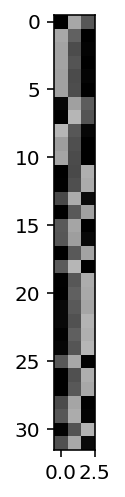

In [4]:
# Plot some data from the data generator
images, labels = next(gen_data)
plt.imshow(images, cmap='gray', aspect='equal')
plt.clim([0, 1])

In [5]:
# Build the model and confirm input/output sizes
model = build_model_ramp_cnn(include_null_class=True)
# model.summary()
images, labels = next(gen_data)
output = model(images)
print(output.shape)

(32, 3)


In [6]:
# Train

dir_models = './saved_models_ramp/'
n_epochs = 20

# Set training optimizer and loss function
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# loss_instance = CategoricalCrossentropy() # requires one-hot label encoding
loss_instance = SparseCategoricalCrossentropy(from_logits=True) # uses categorical integer label encoding
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
model.compile(optimizer=optimizer, loss=loss_instance, metrics=metrics)    

model_filename_baseline = dir_models + 'ramp_model_baseline.h5'
model_baseline, history = train_ramp(model, gen_train=gen_data, n_epochs=n_epochs,
                                     model_filename=model_filename_baseline)

Epoch 1/20
 999/1000 [============================>.] - ETA: 0s - loss: 0.1934 - sparse_categorical_accuracy: 0.9281
Epoch 00001: loss improved from inf to 0.19325, saving model to ./saved_models_ramp/ramp_model_baseline.h5
1000/1000 [==============================] - 18s 18ms/step - loss: 0.1933 - sparse_categorical_accuracy: 0.9282
Epoch 2/20
 997/1000 [============================>.] - ETA: 0s - loss: 0.0071 - sparse_categorical_accuracy: 0.9987
Epoch 00002: loss improved from 0.19325 to 0.00708, saving model to ./saved_models_ramp/ramp_model_baseline.h5
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0071 - sparse_categorical_accuracy: 0.9987
Epoch 3/20
 997/1000 [============================>.] - ETA: 0s - loss: 0.0027 - sparse_categorical_accuracy: 0.9996
Epoch 00003: loss improved from 0.00708 to 0.00268, saving model to ./saved_models_ramp/ramp_model_baseline.h5
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0027 - sparse_categorical_a

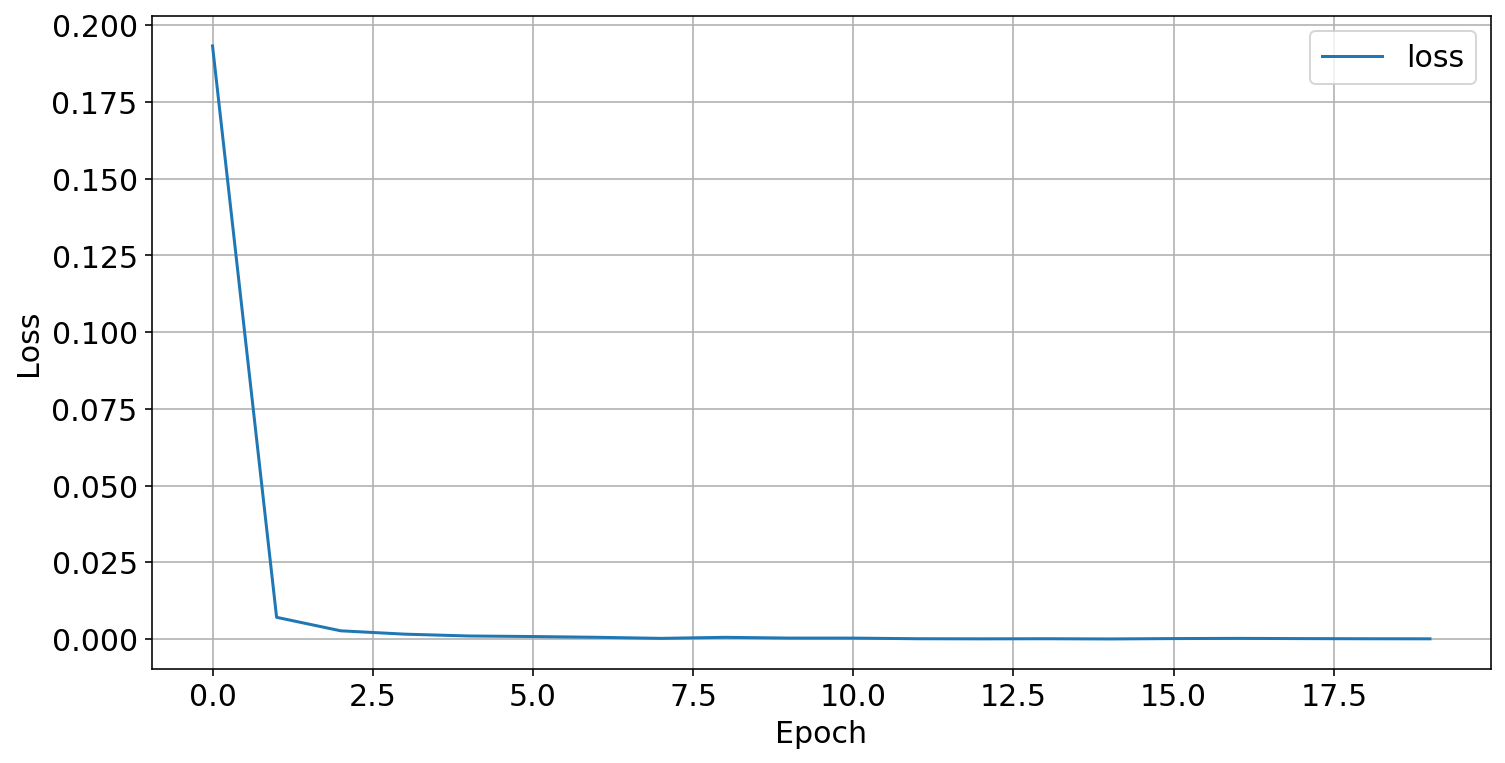

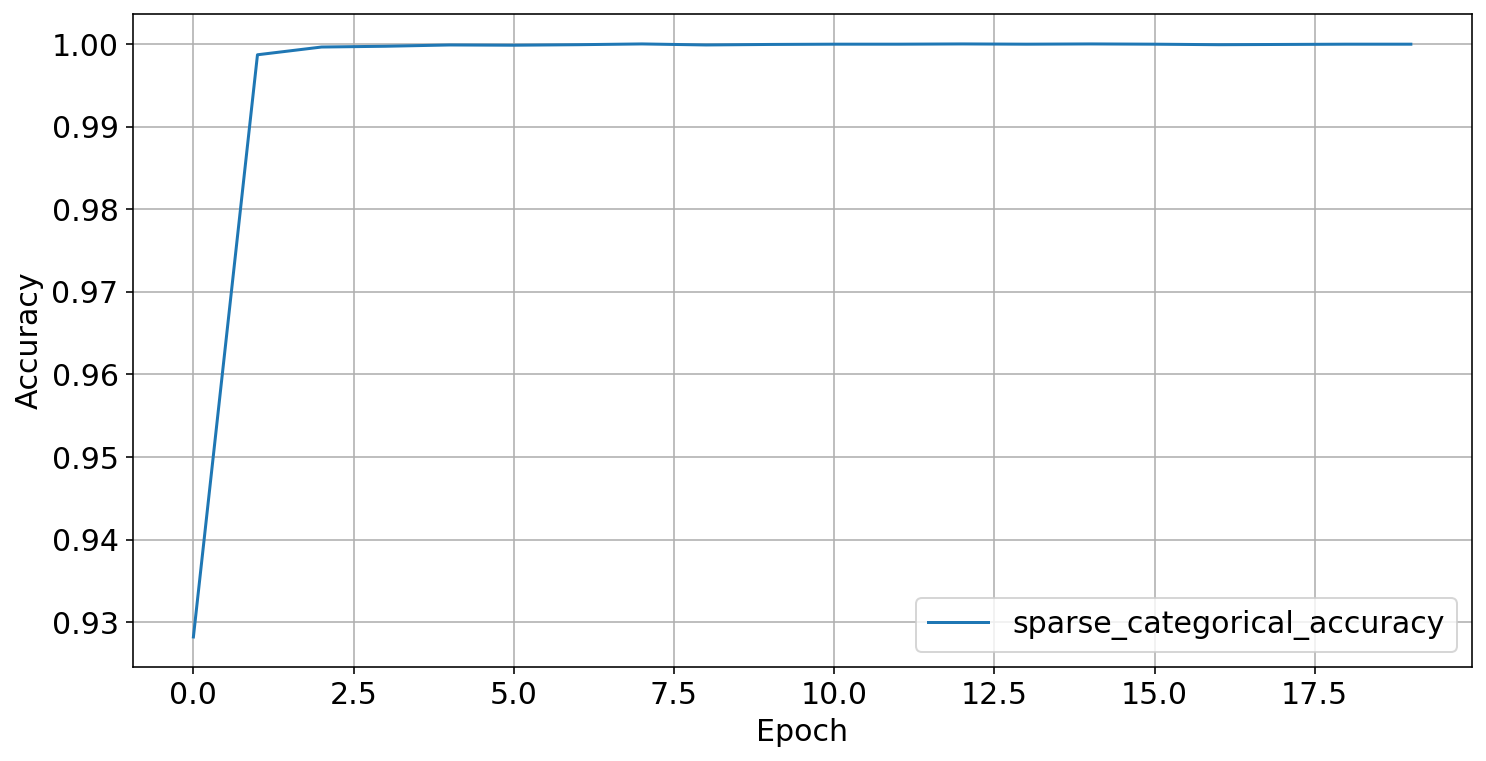

In [7]:
# Plot trainings results
plot_training_history(history)

# Train and test the *uniform* model

In [8]:
# Instantiate generators. One for training data and one for testing data.
null_types = 'u' # string containing any combination of 'u', and 's'
batch_size = 32

gen_data = ramp_generator(batch_size=batch_size, null_types=null_types, p_null_class=0.5)

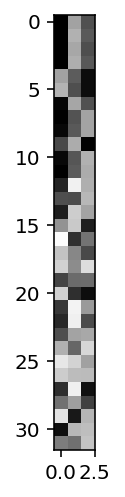

In [9]:
# Plot some data from the data generator
images, labels = next(gen_data)
plt.imshow(images, cmap='gray', aspect='equal')
plt.clim([0, 1])

In [10]:
# # Build the model and confirm input/output sizes
# model = build_model_ramp_cnn(include_null_class=True)
# # model.summary()
# images, labels = next(gen_data)
# output = model(images)
# print(output.shape)

In [11]:
# Train, starting from the baseline model
n_epochs = 30

# # Set training optimizer and loss function
# optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# # loss_instance = CategoricalCrossentropy() # requires one-hot label encoding
# loss_instance = SparseCategoricalCrossentropy(from_logits=True) # uses categorical integer label encoding
# metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
# model.compile(optimizer=optimizer, loss=loss_instance, metrics=metrics)    

model_filename_baseline = dir_models + 'ramp_model_uniform.h5'
model_baseline, history = train_ramp(model, gen_train=gen_data, n_epochs=n_epochs,
                                     model_filename=model_filename_baseline)

Epoch 1/30
 999/1000 [============================>.] - ETA: 0s - loss: 1.1707 - sparse_categorical_accuracy: 0.5460
Epoch 00001: loss improved from inf to 1.17028, saving model to ./saved_models_ramp/ramp_model_uniform.h5
1000/1000 [==============================] - 19s 19ms/step - loss: 1.1703 - sparse_categorical_accuracy: 0.5462
Epoch 2/30
 998/1000 [============================>.] - ETA: 0s - loss: 0.6833 - sparse_categorical_accuracy: 0.6664
Epoch 00002: loss improved from 1.17028 to 0.68299, saving model to ./saved_models_ramp/ramp_model_uniform.h5
1000/1000 [==============================] - 17s 17ms/step - loss: 0.6830 - sparse_categorical_accuracy: 0.6665
Epoch 3/30
 998/1000 [============================>.] - ETA: 0s - loss: 0.4838 - sparse_categorical_accuracy: 0.7858
Epoch 00003: loss improved from 0.68299 to 0.48363, saving model to ./saved_models_ramp/ramp_model_uniform.h5
1000/1000 [==============================] - 20s 20ms/step - loss: 0.4836 - sparse_categorical_accu

Epoch 26/30
 998/1000 [============================>.] - ETA: 0s - loss: 0.1790 - sparse_categorical_accuracy: 0.9367
Epoch 00026: loss did not improve from 0.17141
1000/1000 [==============================] - 17s 17ms/step - loss: 0.1790 - sparse_categorical_accuracy: 0.9367
Epoch 27/30
 997/1000 [============================>.] - ETA: 0s - loss: 0.1709 - sparse_categorical_accuracy: 0.9394
Epoch 00027: loss improved from 0.17141 to 0.17059, saving model to ./saved_models_ramp/ramp_model_uniform.h5
1000/1000 [==============================] - 17s 17ms/step - loss: 0.1706 - sparse_categorical_accuracy: 0.9395
Epoch 28/30
 999/1000 [============================>.] - ETA: 0s - loss: 0.1702 - sparse_categorical_accuracy: 0.9399
Epoch 00028: loss improved from 0.17059 to 0.17005, saving model to ./saved_models_ramp/ramp_model_uniform.h5
1000/1000 [==============================] - 17s 17ms/step - loss: 0.1700 - sparse_categorical_accuracy: 0.9400
Epoch 29/30
 998/1000 [====================

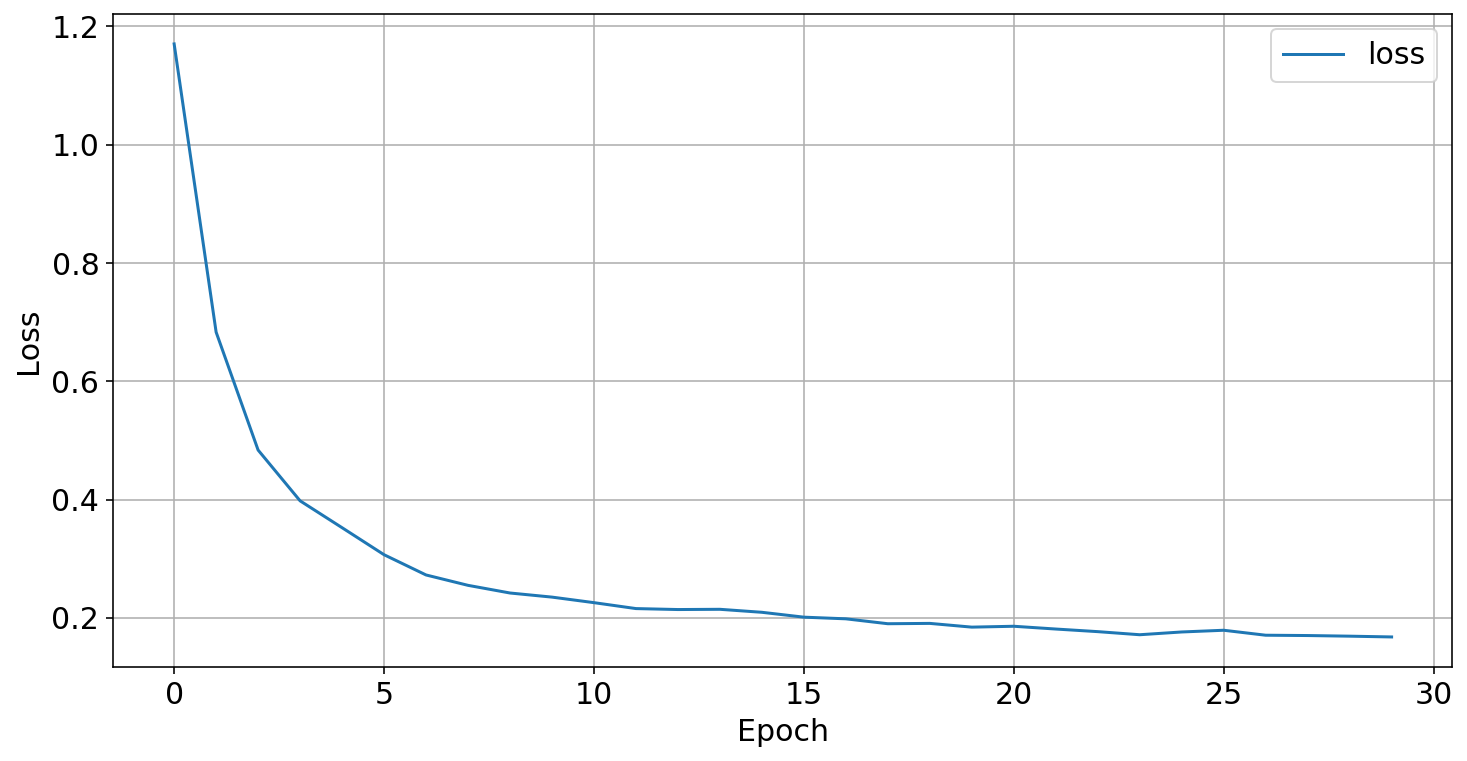

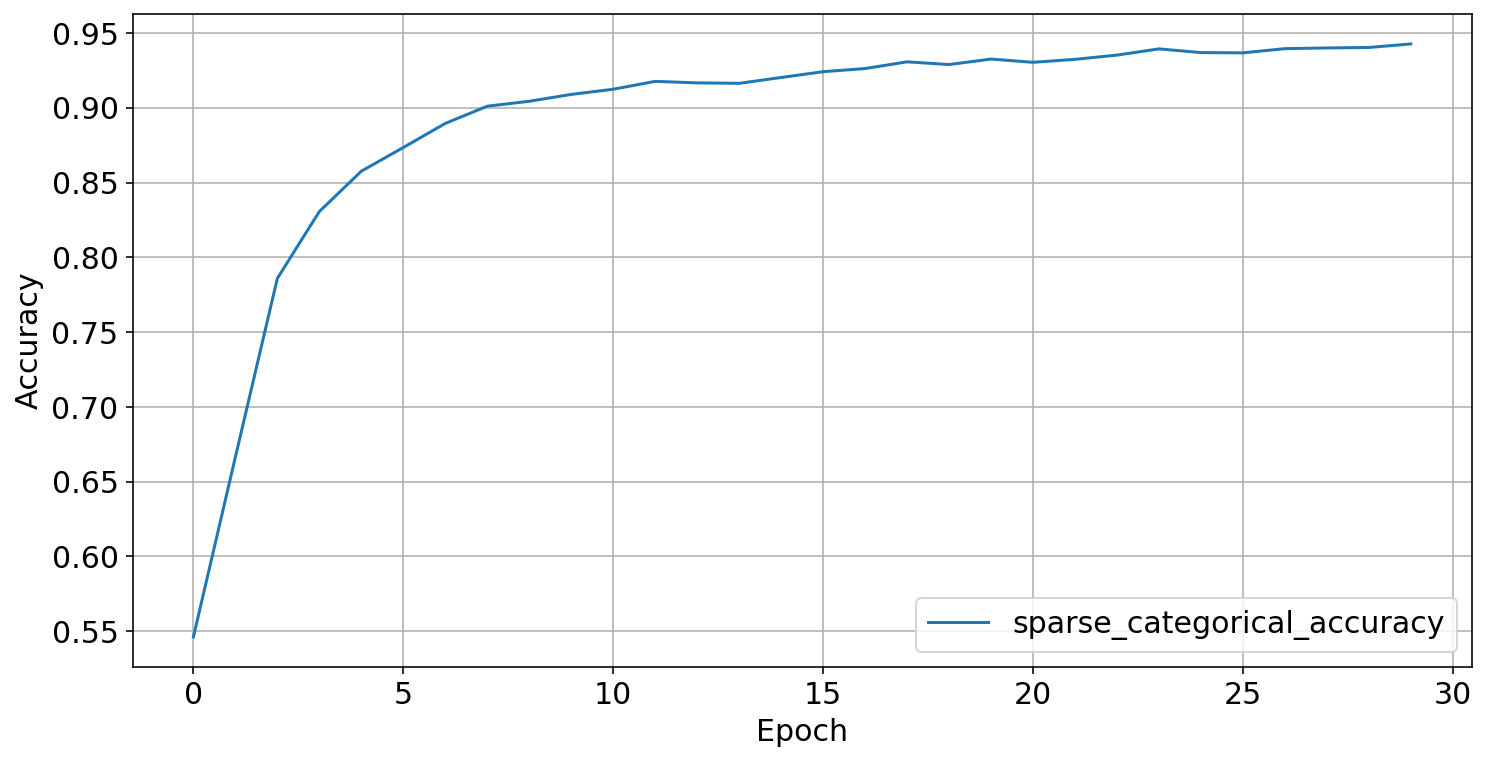

In [12]:
# Plot trainings results
plot_training_history(history)